In [1]:
import cv2  
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow 
from google.colab import files

Загружаем изображение:

In [2]:
files.upload()

Saving cat.jpg to cat (2).jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00\x1c\x00\x1c\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x01^\x02N\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x04\x05\x06\x03\x07\x08\xff\xc4\x00D\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x06\x05\x02\x06\x02\x02\x03\x01\x02\x03\x00\x04\x11\x05\x12!1A\x13Qaq\x06"\x81\x142\x91\xa1\xb1\x07#BR\xc1\xd1\x153br\xe1\x82\xf0$CSc\x92\xf1\x16\xa2\x084Ts\xb2\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x000\x11\x01\x01\x00\x02\x02\x02\x02\x01\x02\x04\x06\x03\x01\x01\x01\x00\x00\x0

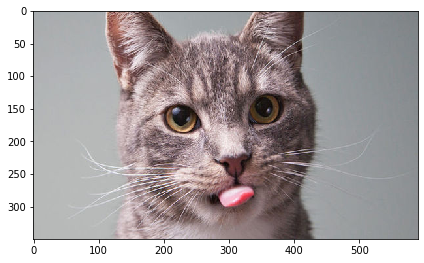

In [3]:
image = cv2.imread('cat.jpg')
imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image.shape

(350, 590, 3)

##Функция активации

In [5]:
def ReLu(x):
    return np.maximum(0, x)

##Max Pooling
Уменьшаем размер. Максимальный пулинг возвращает максимальное значение из части изображения

In [6]:
def MaxPooling(img, pool_size):
    width = img.shape[-2]//pool_size
    height = img.shape[-1]//pool_size
    M = img.shape[0]

    ans = np.empty((M, width, height), dtype=np.float32)

    for m in range(M):
        for i in range(width):
            for j in range(height):
                ans[m, i, j] = np.max(img[m, i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])

    return ans


##Batch Normalization

In [7]:
def BatchNormalization(X, gamma, beta, epsilon):
    mean = X.mean(axis=0)
    var = ((X - mean)**2).mean(axis=0)
    
    X_ = (X - mean) / np.sqrt(var + epsilon) #нормализация

    Y = gamma * X_ + beta #сжатие и сдвиг
    return Y

##SoftMax

Функция превращает наборы чисел в вероятности. Сумма = 1.

In [8]:
def SoftMax(x):
  return np.exp(x)/sum(np.exp(x))

##Свертка с 5 фильтрами 3х3х3 (случайные веса)

In [9]:
input = image.copy()

M = 5 # количество фильтров
# фильтры 3x3x3
R = 3
S = 3
C = 3

width = input.shape[0]
height = input.shape[1]

F = width
E = height

filters = np.random.uniform(size=(M, C, R, S)) #случайные веса
B = np.zeros(M)
output = np.empty((M, F, E), dtype=np.float32)

for m in range(M):
    for x in range(F):
        for y in range(E):
            output[m, x, y] = B[m]
            for i in range(R):
                for j in range(S):
                    for k in range(C):
                        if x + i < input.shape[1]:
                          x_ = x+i 
                        else:
                          x_ = input.shape[1] - 1

                        if y+j < input.shape[2]:
                          y_ = y + j 
                        else:
                          y_ = input.shape[2] - 1

                        output[m, x, y] += input[k, x_, y_] * filters[m, k, i, j]

In [10]:
output

array([[[2153.0427, 2110.141 , 2080.1392, ..., 2080.1392, 2080.1392,
         2080.1392],
        [2158.1768, 2117.9646, 2092.1897, ..., 2092.1897, 2092.1897,
         2092.1897],
        [2163.8225, 2128.702 , 2109.1055, ..., 2109.1055, 2109.1055,
         2109.1055],
        ...,
        [1434.9323, 1610.6158, 1732.317 , ..., 1732.317 , 1732.317 ,
         1732.317 ],
        [1379.7632, 1551.5912, 1671.9567, ..., 1671.9567, 1671.9567,
         1671.9567],
        [1379.5242, 1545.5648, 1664.0488, ..., 1664.0488, 1664.0488,
         1664.0488]],

       [[2103.3928, 2053.0398, 2031.7526, ..., 2031.7526, 2031.7526,
         2031.7526],
        [2108.6301, 2065.0195, 2046.8801, ..., 2046.8801, 2046.8801,
         2046.8801],
        [2114.1768, 2077.0945, 2062.715 , ..., 2062.715 , 2062.715 ,
         2062.715 ],
        ...,
        [1448.2539, 1640.669 , 1732.722 , ..., 1732.722 , 1732.722 ,
         1732.722 ],
        [1290.8416, 1478.6943, 1569.4988, ..., 1569.4988, 1569.4988,
   

Далее слой нормализации

In [11]:
for m in range(M):      
  output[m] = BatchNormalization(output[m], 1, 0, 1e-12)

In [12]:
output

array([[[ 0.45150334,  0.31878254,  0.14563207, ...,  0.14563207,
          0.14563207,  0.14563207],
        [ 0.46910843,  0.35174704,  0.20163804, ...,  0.20163804,
          0.20163804,  0.20163804],
        [ 0.4884683 ,  0.39698902,  0.28025565, ...,  0.28025565,
          0.28025565,  0.28025565],
        ...,
        [-2.0109684 , -1.7859827 , -1.4709029 , ..., -1.4709029 ,
         -1.4709029 , -1.4709029 ],
        [-2.2001488 , -2.034685  , -1.7514331 , ..., -1.7514331 ,
         -1.7514331 , -1.7514331 ],
        [-2.2009683 , -2.0600772 , -1.7881856 , ..., -1.7881856 ,
         -1.7881856 , -1.7881856 ]],

       [[ 0.4429091 ,  0.25584736,  0.12050646, ...,  0.12050646,
          0.12050646,  0.12050646],
        [ 0.46154457,  0.30927747,  0.19253437, ...,  0.19253437,
          0.19253437,  0.19253437],
        [ 0.48128065,  0.3631322 ,  0.26793045, ...,  0.26793045,
          0.26793045,  0.26793045],
        ...,
        [-1.8882158 , -1.5833427 , -1.3032881 , ..., -

Функция активации - ReLu

In [13]:
for m in range(M):
    for x in range(F):
        for y in range(E):
            output[m, x, y] = ReLu(output[m, x, y])

In [14]:
output

array([[[0.45150334, 0.31878254, 0.14563207, ..., 0.14563207,
         0.14563207, 0.14563207],
        [0.46910843, 0.35174704, 0.20163804, ..., 0.20163804,
         0.20163804, 0.20163804],
        [0.4884683 , 0.39698902, 0.28025565, ..., 0.28025565,
         0.28025565, 0.28025565],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.4429091 , 0.25584736, 0.12050646, ..., 0.12050646,
         0.12050646, 0.12050646],
        [0.46154457, 0.30927747, 0.19253437, ..., 0.19253437,
         0.19253437, 0.19253437],
        [0.48128065, 0.3631322 , 0.26793045, ..., 0.26793045,
         0.26793045, 0.26793045],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

MaxPooling 2x2

In [15]:
result = MaxPooling(output, 2)

In [16]:
result

array([[[0.46910843, 0.20163804, 0.20163804, ..., 0.20163804,
         0.20163804, 0.20163804],
        [0.49272704, 0.2989243 , 0.2989243 , ..., 0.2989243 ,
         0.2989243 , 0.2989243 ],
        [0.5289963 , 0.39999124, 0.39999124, ..., 0.39999124,
         0.39999124, 0.39999124],
        ...,
        [0.8737538 , 1.517073  , 1.517073  , ..., 1.517073  ,
         1.517073  , 1.517073  ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.46154457, 0.19253437, 0.19253437, ..., 0.19253437,
         0.19253437, 0.19253437],
        [0.4862488 , 0.29194072, 0.29194072, ..., 0.29194072,
         0.29194072, 0.29194072],
        [0.52223575, 0.38081536, 0.38081536, ..., 0.38081536,
         0.38081536, 0.38081536],
        ...,
        [1.3435601 , 1.8675354 , 1.8675354 , ..., 1.8675354 ,
         1.8675354 , 1.8675354 ],
        [0. 

SoftMax

In [17]:
soft_max = result
for m in range(M):
  soft_max = SoftMax(result[m])

In [18]:
soft_max[1]

array([0.00511019, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341379,
       0.00341379, 0.00341379, 0.00341379, 0.00341379, 0.00341

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


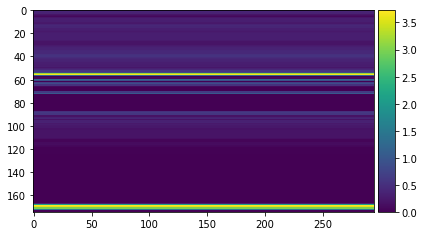

In [19]:
imshow(result[0])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


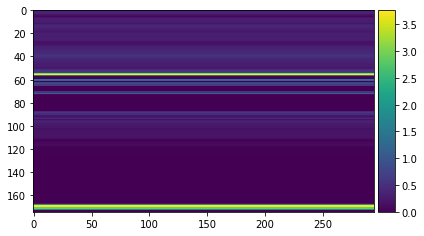

In [20]:
imshow(result[1])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


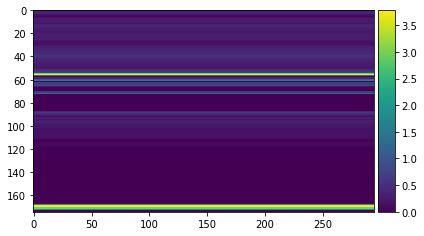

In [21]:
imshow(result[2])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


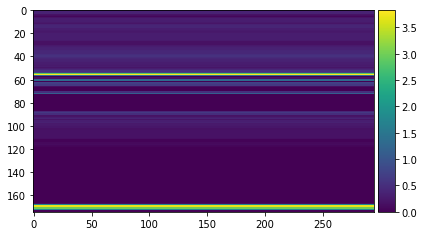

In [23]:
imshow(result[3])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


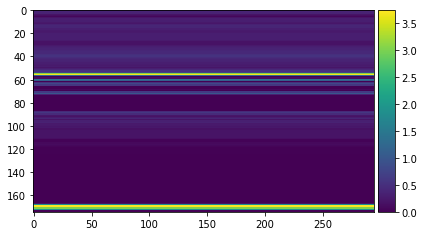

In [24]:
imshow(result[4])